# Goodreads - Data analysis and Prediction model



In [50]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('goodreads_data.csv')
df.head()

,Title,Author,Average Rating,Rating,Year Published
0,Self-Help,Lorrie Moore,4.14,"3,786",1985
1,What's Our Problem?: A Self-Help Book for Soci...,Tim Urban,4.28,"3,397",2023
2,Parenting from the Inside Out: How a Deeper Se...,Daniel J. Siegel,4.16,"4,799",2003
3,How to Be Fine: What We Learned from Living by...,Jolenta Greenberg,3.54,"4,414",2020
4,Get Out of Your Mind and Into Your Life: The N...,Steven C. Hayes,4.06,"3,056",2005


In [52]:
df.describe() 

,Average Rating,Year Published
count,6230.00000,6230.000000
mean,3.65600,1094.604334
std,0.84137,1006.146521
min,0.00000,0.000000
25%,3.40000,0.000000
50%,3.80000,1994.000000
75%,4.17000,2013.000000
max,5.00000,7303.000000


In [62]:

df = df.rename(columns={"Title": "title", "Author":"author","Average Rating": "avg_rating", "Rating":"rating", "Year Published":"year", })

In [54]:
df.isnull().sum() 

title         0
author        0
avg_rating    0
rating        0
year          0
dtype: int64

In [63]:
df['num_of_occ'] = df.groupby('title')['title'].transform('count')


In [64]:
df['rate_occ'] = df['avg_rating'] * df['num_of_occ']

In [66]:
df

,title,author,avg_rating,rating,year,num_of_occ,rate_occ
0,Self-Help,Lorrie Moore,4.14,"3,786",1985,6,24.84
1,What's Our Problem?: A Self-Help Book for Soci...,Tim Urban,4.28,"3,397",2023,2,8.56
2,Parenting from the Inside Out: How a Deeper Se...,Daniel J. Siegel,4.16,"4,799",2003,2,8.32
3,How to Be Fine: What We Learned from Living by...,Jolenta Greenberg,3.54,"4,414",2020,2,7.08
4,Get Out of Your Mind and Into Your Life: The N...,Steven C. Hayes,4.06,"3,056",2005,2,8.12
...,...,...,...,...,...,...,...
6225,Better!: Self Help For The Rest of Us,Terry Lancaster,4.50,16,0,144,648.00
6226,"Self Esteem: You Don't Need a Workbook, You Ne...",Michelle Kade,4.78,9,0,139,664.42
6227,DirtBirds' Self-Help Guide: How to Have Confid...,Sue Collins,3.52,21,0,48,168.96
6228,Overcoming Social Anxiety and Shyness Self-hel...,Gillian Butler,4.17,6,2007,24,100.08


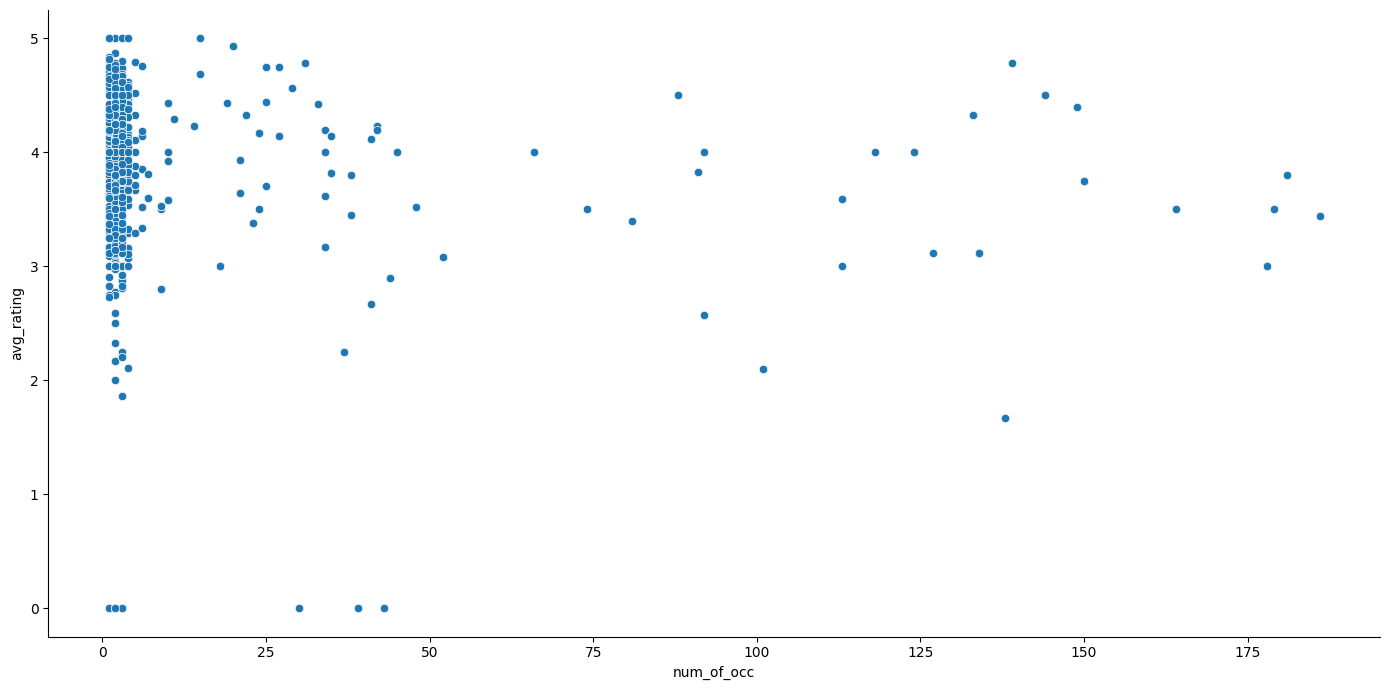

In [58]:
sns.relplot(x="num_of_occ", y="avg_rating", data=df, height=7, aspect = 2)

<Axes: xlabel='year', ylabel='avg_rating'>

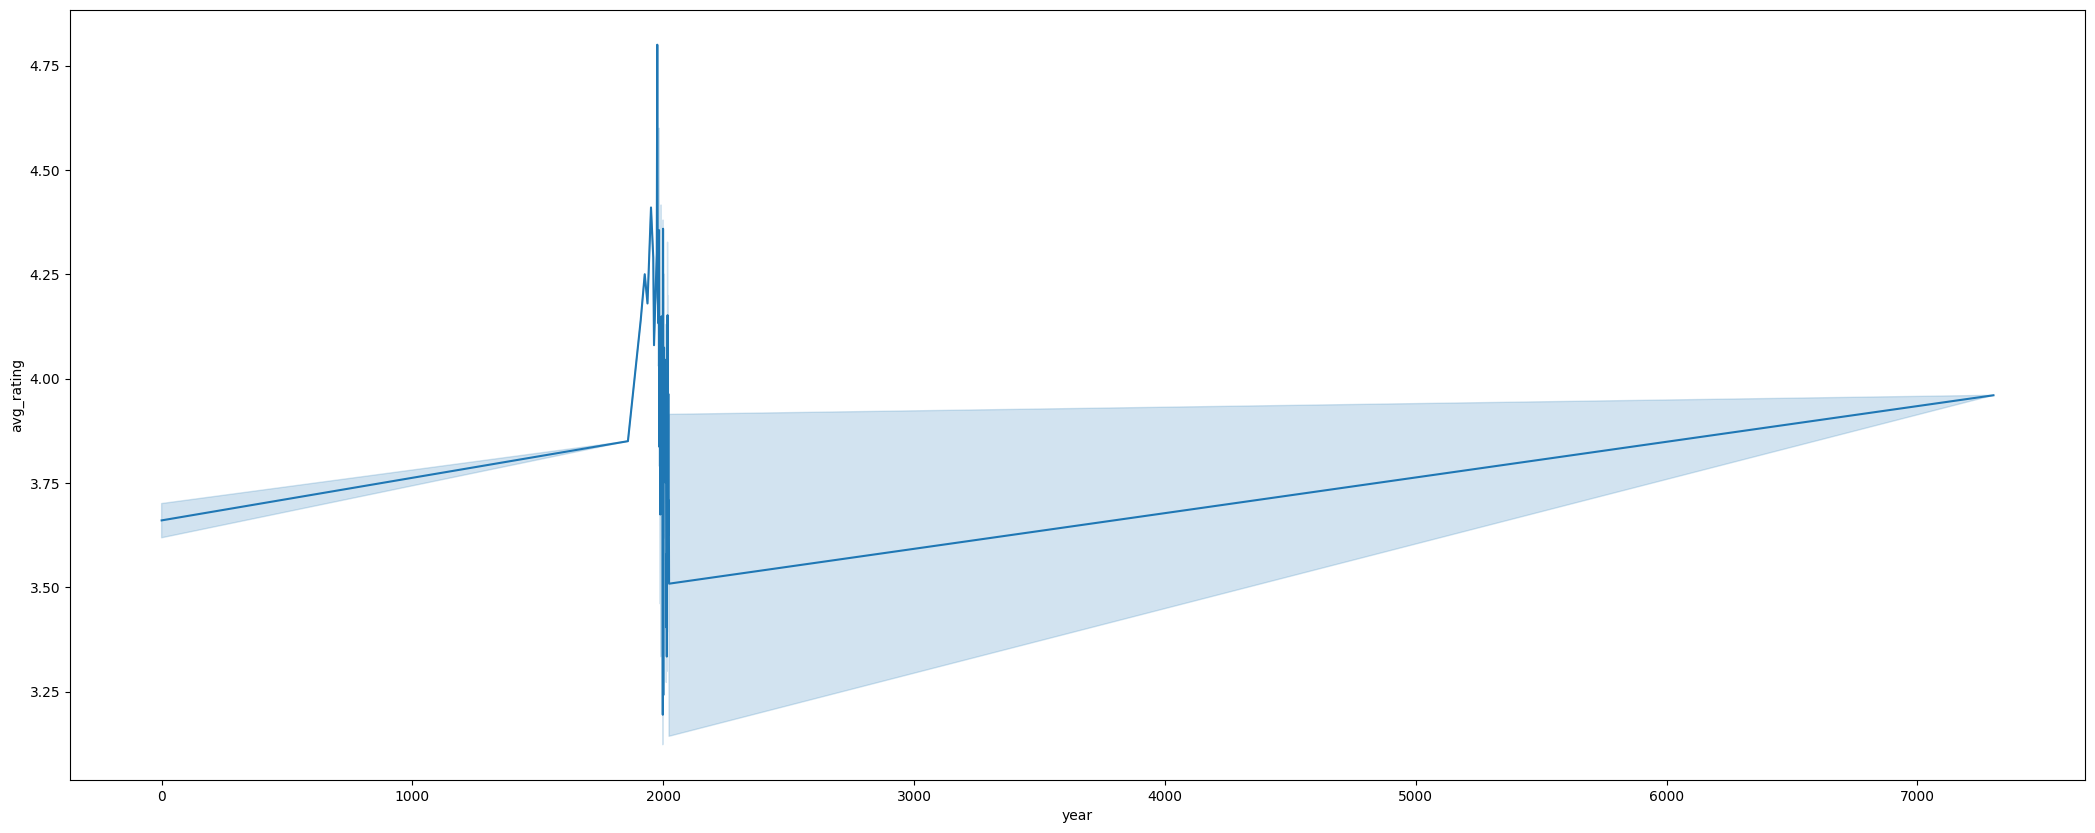

In [59]:
fig = plt.gcf()
fig.set_size_inches(26, 10)
sns.lineplot(x="year", y="avg_rating", data=df)

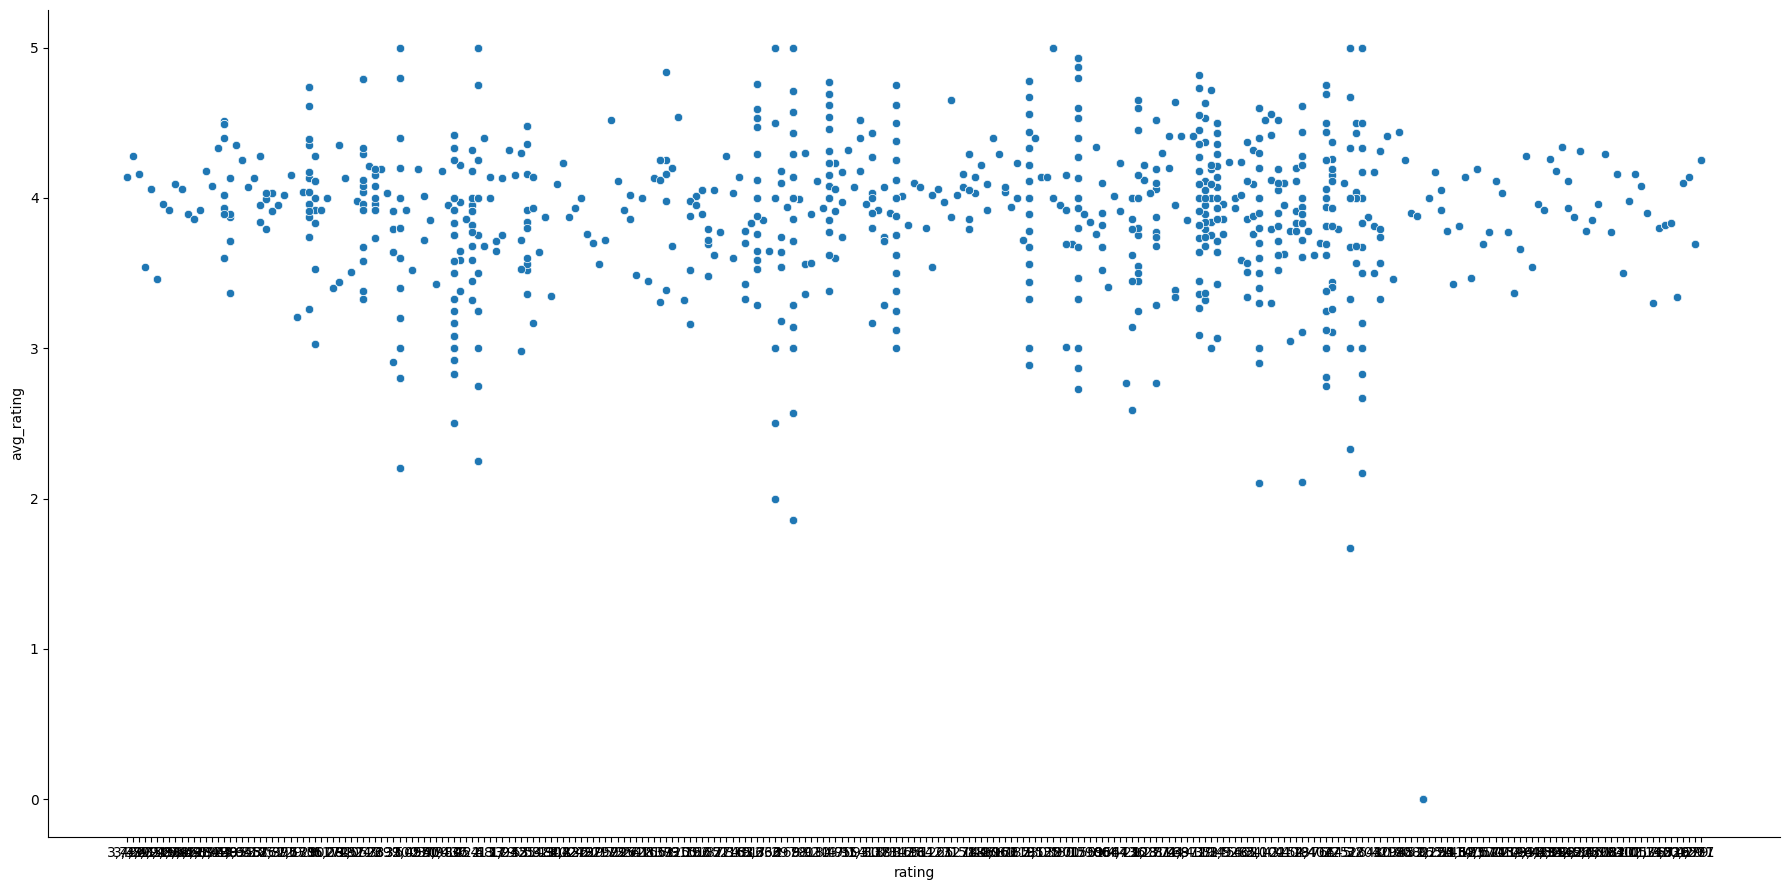

In [48]:
sns.relplot(x="rating", y="avg_rating", data=df, height=9, aspect = 2)

In [67]:
df['rating']=df['rating'].str.replace(',','')


In [69]:
df['rating'] = df['rating'].astype(float)

In [70]:
df

,title,author,avg_rating,rating,year,num_of_occ,rate_occ
0,Self-Help,Lorrie Moore,4.14,3786.0,1985,6,24.84
1,What's Our Problem?: A Self-Help Book for Soci...,Tim Urban,4.28,3397.0,2023,2,8.56
2,Parenting from the Inside Out: How a Deeper Se...,Daniel J. Siegel,4.16,4799.0,2003,2,8.32
3,How to Be Fine: What We Learned from Living by...,Jolenta Greenberg,3.54,4414.0,2020,2,7.08
4,Get Out of Your Mind and Into Your Life: The N...,Steven C. Hayes,4.06,3056.0,2005,2,8.12
...,...,...,...,...,...,...,...
6225,Better!: Self Help For The Rest of Us,Terry Lancaster,4.50,16.0,0,144,648.00
6226,"Self Esteem: You Don't Need a Workbook, You Ne...",Michelle Kade,4.78,9.0,0,139,664.42
6227,DirtBirds' Self-Help Guide: How to Have Confid...,Sue Collins,3.52,21.0,0,48,168.96
6228,Overcoming Social Anxiety and Shyness Self-hel...,Gillian Butler,4.17,6.0,2007,24,100.08


In [71]:
yy = df['avg_rating'].values
df.drop([ 'title', 'author', 'year','avg_rating'], axis=1, inplace=True)

In [72]:
df

,rating,num_of_occ,rate_occ
0,3786.0,6,24.84
1,3397.0,2,8.56
2,4799.0,2,8.32
3,4414.0,2,7.08
4,3056.0,2,8.12
...,...,...,...
6225,16.0,144,648.00
6226,9.0,139,664.42
6227,21.0,48,168.96
6228,6.0,24,100.08


In [73]:
print(yy)

[4.14 4.28 4.16 ... 3.52 4.17 3.5 ]


In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, yy, test_size=0.3)

In [75]:
X_train

,rating,num_of_occ,rate_occ
4201,8.0,74,259.00
1708,15.0,4,16.52
1454,117.0,1,3.50
2506,6.0,164,574.00
584,13.0,3,12.00
...,...,...,...
2325,5.0,34,142.80
6096,5.0,149,655.60
4211,5.0,42,176.40
4291,8.0,134,418.08


In [76]:
X_test

,rating,num_of_occ,rate_occ
6109,5.0,9,25.20
535,20.0,2,8.00
1415,149.0,2,7.86
2517,3.0,133,575.89
1709,42.0,4,17.24
...,...,...,...
5300,3.0,22,95.26
2495,5.0,34,142.80
1631,19.0,3,11.37
1369,315.0,3,9.96


In [77]:
y_test

array([2.8 , 4.  , 3.93, ..., 3.79, 3.32, 4.14])

In [78]:
y_train

array([3.5 , 4.13, 3.5 , ..., 4.2 , 3.12, 4.56])

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4))

parameters = {
    'learning_rate': [0.001, 0.01, 0.02, 0.1, 0.2, 1.0],
    'n_estimators': [10, 50, 100, 200]
}

grad_Ada = GridSearchCV(model, parameters, refit=True)
grad_Ada.fit(X_train, y_train)

print('Best Score: ', grad_Ada.best_score_*100, '\nBest Parameters: ', grad_Ada.best_params_)

Best Score:  86.12572900288868 
Best Parameters:  {'learning_rate': 1.0, 'n_estimators': 100}


In [80]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

parameters = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 10, 12, 15],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15]
}

grad_rf = GridSearchCV(model, parameters, refit=True, cv=10)
grad_rf.fit(X_train, y_train)

print('Best Score: ', grad_rf.best_score_*100, '\nBest Parameters: ', grad_rf.best_params_)

Best Score:  99.15977633454241 
Best Parameters:  {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}
